Links:
* [How to Use Word Embedding Layers for Deep Learning with Keras](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)
* [What Are Word Embeddings for Text?](https://machinelearningmastery.com/what-are-word-embeddings/)
* [How to Develop a Word Embedding Model for Predicting Movie Review Sentiment
](https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/)
* [Embed, encode, attend, predict: The new deep learning formula for state-of-the-art NLP models](https://explosion.ai/blog/deep-learning-formula-nlp)
* [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Input, Dense, Embedding, Flatten, Dropout
from keras.models import Model, Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import seaborn as sn
from time import time
import os
import encoders

Using TensorFlow backend.


In [2]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
normalized_tweets = raw_tweets.str.upper()
char_to_int, int_to_char = encoders.create_encoder_decoder(normalized_tweets.str.cat())
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
max_tweet_len = normalized_tweets.str.len().max()
X = encoders.encode_strings(normalized_tweets, char_to_int, max_tweet_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
filepath, model = models.model5(len(char_to_int) + 1, max_tweet_len)
if filepath in os.listdir():
    model.load_weights(filepath)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 166)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 166, 256)          134656    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 163, 64)           65600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 163, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 81, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)    

In [4]:
#TODO - Train this on a GPU
#models.train(X_train, y_train, model, filepath)

In [5]:
predictions = np.argmax(model.predict(X_test), axis=1)

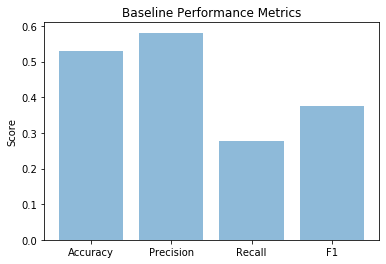

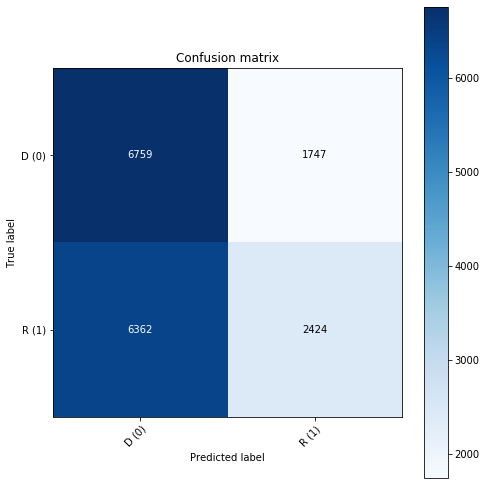

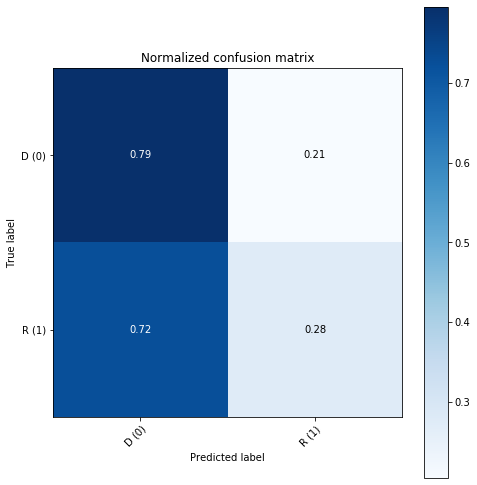

Accuracy: 0.5310548230395559
Precision: 0.581155598177895
Recall: 0.27589346687912586
F1: 0.3741606853438296


In [6]:
metrics, confusion_matrix = models.plot_results(y_test, predictions)
(accuracy, precision, recall, f1) = metrics
print('Accuracy: %s' % accuracy)
print('Precision: %s' % precision)
print('Recall: %s' % recall)
print('F1: %s' % f1)

In [7]:
metrics

[0.5310548230395559,
 0.581155598177895,
 0.27589346687912586,
 0.3741606853438296]